In [32]:
import pandas as pd
from pandas_analysis import load_all_csv, IATA_TO_NAME
import matplotlib.pyplot as plt

In [41]:
data = load_all_csv()
data = data[data['available_seats'] != -1]
data['departure_date'] = pd.to_datetime(data['departure_date'])
data['scrape_date'] = pd.to_datetime(data['scrape_date'])

# Filter rows where difference between departure_date and scrape_date is 5 days
five_days_before_departure = data[data['departure_date'] - data['scrape_date'] == pd.Timedelta(days=5)]

# Group data by airline_iata_code and available_seats, and count the occurrences
seat_counts = five_days_before_departure.groupby(['airline_iata_code', 'available_seats']).size().reset_index(name='occurrences')

In [47]:
# Calculate average number of available seats for the filtered rows
average_seats = five_days_before_departure['available_seats'].mean()
print(f"Average available seats 5 days before departure: {average_seats:.2f}")

Average available seats 5 days before departure: 3.27


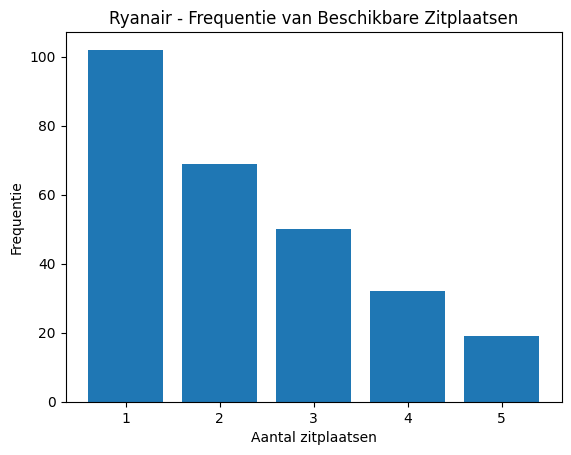

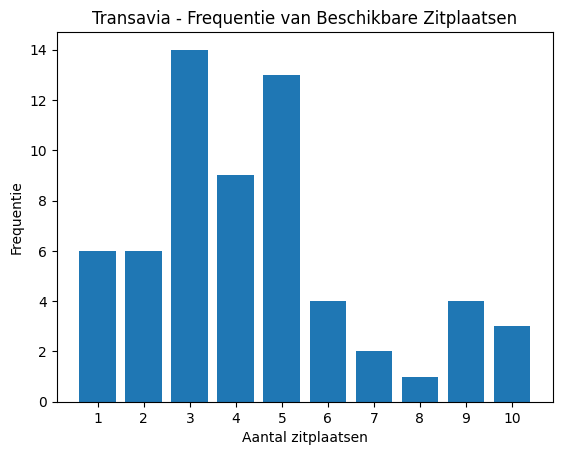

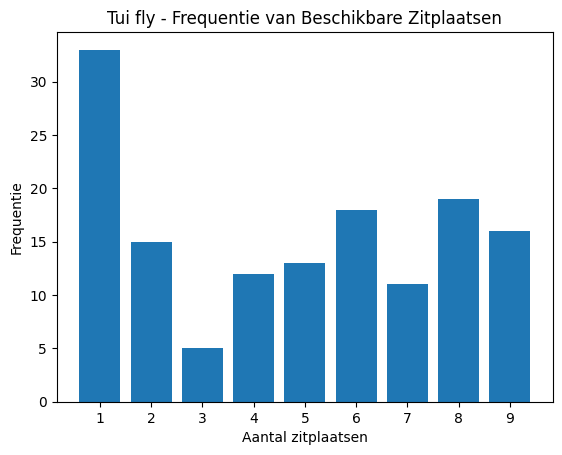

In [46]:
for airline_code in seat_counts['airline_iata_code'].unique():
    airline_data = seat_counts[seat_counts['airline_iata_code'] == airline_code]
    plt.bar(airline_data['available_seats'], airline_data['occurrences'])
    plt.xticks(airline_data['available_seats'])  #
    plt.xlabel('Aantal zitplaatsen')
    plt.ylabel('Frequentie')
    plt.title(f"{IATA_TO_NAME[airline_code]} - Frequentie van Beschikbare Zitplaatsen")
    plt.show()